# Short Assignment 6 - Solutions

# Question 3

**Solve this problem on paper**

Consider the following perceptron:

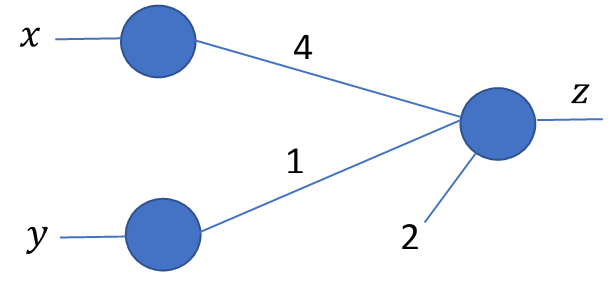

In [2]:
from IPython.display import Image
Image('figures/Perceptron.png', width=400)

Recall that the perceptron uses the activation function:

\begin{align*}
\phi(x)=\begin{cases}-1 & x\leq 0 \\ 1 & x>0\end{cases}
\end{align*}

And the cost function is:

\begin{align*}
E_p(\mathbf{w},b) = -\sum_{m\in\mathcal{M}}(\mathbf{w}^T\mathbf{x}_n + b)^T t_n
\end{align*}

where  is the set of all misclassified points. The update equations for the weights and bias term are:

\begin{align*}
\mathbf{w}^{(t+1)} &\leftarrow & \mathbf{w}^{(t)} - \eta \frac{\partial E_p(\mathbf{w},b)}{\partial \mathbf{w}} = \mathbf{w}^{(t)} + \eta \mathbf{x}_n t_n\\
b^{(t+1)} &\leftarrow & b^{(t)} - \eta\frac{\partial E_p(\mathbf{w},b)}{\partial b} = b^{(t)} + \eta t_n
\end{align*}

Suppose you have the following 5 data samples $(x,y)$ and their corresponding labels $t$:

\begin{align*}
(x_1,y_1)=(1,0)\text{ with }t_1&=1\\
(x_2,y_2)=(4,2)\text{ with }t_2&=1\\
(x_3,y_3)=(0,-1)\text{ with }t_3&=-1\\
(x_4,y_4)=(-1,-1)\text{ with }t_4&=-1\\
(x_5,y_5)=(-2,1)\text{ with }t_5&=-1
\end{align*}

What is the smallest value for the learning rate $\eta$ such that the updated network will result in zero misclassified points using only one iteration?

___

As the Perceptron algorithm uses misclassified points to make updates in its parameters (weights and bias), the first step is to identify if there are any misclassified points. 

Note that the Perceptron create the following decision boundary: 

\begin{align*}
z &= \phi(v), \text{ where } v = 4x + y + 2
\end{align*}

where the activation function $\phi(x) = \begin{cases}1, & x>0 \\ -1, & x\leq 0\end{cases}$.

Let's evaluate the output for each of the 5 data samples provided:

| x | y | z | t | 
|---|---|---|---|
| 1 | 0 | 1 | 1 |
| 4 | 2 | 1 | 1 |
| 0 | -1| 1 | -1|
| -1| -1| -1| -1|
| -2| 1 | -1| -1|

We can see that data sample $(x_3,y_3)=(0,-1)$ is misclassified. So this will be the only point that will be used to make the updates for the weights and bias term of the Perceptron.

The update equations are given as:

\begin{align*}
\mathbf{w}^{(t+1)} &= \mathbf{w}^{(t)} + \eta \mathbf{x}_n t_n = \begin{bmatrix}4\\1\end{bmatrix} + \eta \begin{bmatrix}0\\-1\end{bmatrix} (-1) = \begin{bmatrix}4\\1+\eta\end{bmatrix}\\
b^{(t+1)} &= b^{(t)} + \eta t_n = 2 + \eta (-1) = 2-\eta
\end{align*}

The new equation for the decision surface is:

\begin{align*}
z &= \phi(v), \text{ where } v = 4x + (1+\eta)y + 2 - \eta
\end{align*}

Putting it all together for the misclassified point, we now have:

\begin{align*}
v &= \mathbf{w}^{(t+1)^T}\begin{bmatrix}0\\-1\end{bmatrix} + b^{(t+1)}\\
&= [4, 1+\eta] \begin{bmatrix}0\\-1\end{bmatrix} + 2-\eta\\
&=-1 -\eta + 2 - \eta\\
&= 1 -2\eta
\end{align*}

Now, note that, from the activation function we are using, the point $[0,-1]$ will be classified with label $-1$ if $v\leq 0$, hence:

\begin{align*}
1 -2\eta \leq 0 \iff \eta \geq 0.5
\end{align*}

The smallest value for the learning rate such that the updated network will result in zero misclassified points using only one iteration is $\eta=0.5$. 

Check: 

\begin{align*}
\eta=0.5: z &= \phi(v), \text{ where } v = 4x + 1.5y + 1.5
\end{align*}

| x | y | v | z | t | 
|---|---|---|---|---|
| 1 | 0 |5.5| 1 | 1 |
| 4 | 2 |20.5| 1 | 1 |
| 0 | -1| 0 | -1 | -1|
| -1| -1| -4| -1| -1|
| -2| 1 | -5| -1| -1|

___

# Question 4

Consider the following optimization problem:

\begin{align*}
\arg_{x_1, x_2} \min x_1 + x_2 \text{ subject to } x_1^2 + x_2^2 \geq 2
\end{align*}

Answer the following questions on paper, and submit a scan of your work:

1. Write down the Lagrangian function for this optimization problem.

2. What are the Karush-Kuhn-Tucker (KKT) conditions for this Lagrangian function?

1. The Lagrangian optimization function is:

\begin{align*}
\mathcal{L} = x_1 + x_2 - \lambda (x_1^2 + x_2^2-2)
\end{align*}

2. The KKT conditions for this Lagrangian function are:

\begin{align*}
x_1^2 + x_2^2 -2 &\geq 0\\
\lambda &\geq 0 \\
\lambda (x_1^2 + x_2^2 - 2) &= 0
\end{align*}

# Question 5

Suppose you have the following training data set and suppose you expect your training data set to be representative of your test data. Of all of the methods we can covered in the course, which would you use to classify this data into black x vs. red o. Why? Justify your answer.

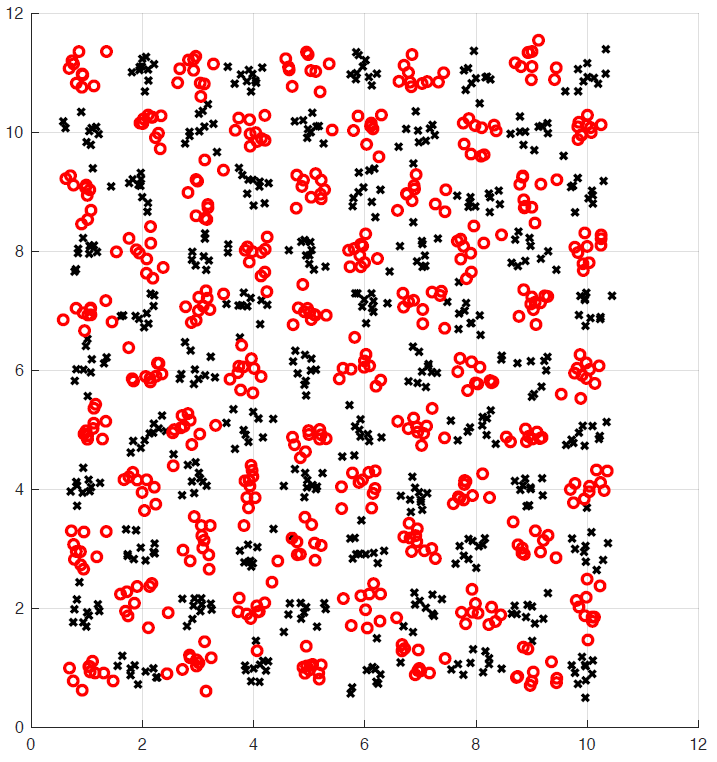

In [3]:
Image('figures/Cross_circles.png', width=400)

From the classifiers we have learned so far, the weighted $k$-NN would be able to perform reasonably well. The resulting decision surface from the $k$-NN classifier will not be smooth as there is a significantly large regions of overlap, where $k$-NN will have difficulty in making a decision.

The SVM classifier is also well suited for this type of data: a kernel function will transform the data into a higher-dimensional space where classes become linearly separable and finds a linear decision boundary in that space that maximizes the margin.

# Question 6

Consider the following performance from five different classifiers, A, B, C and D on three data sets.

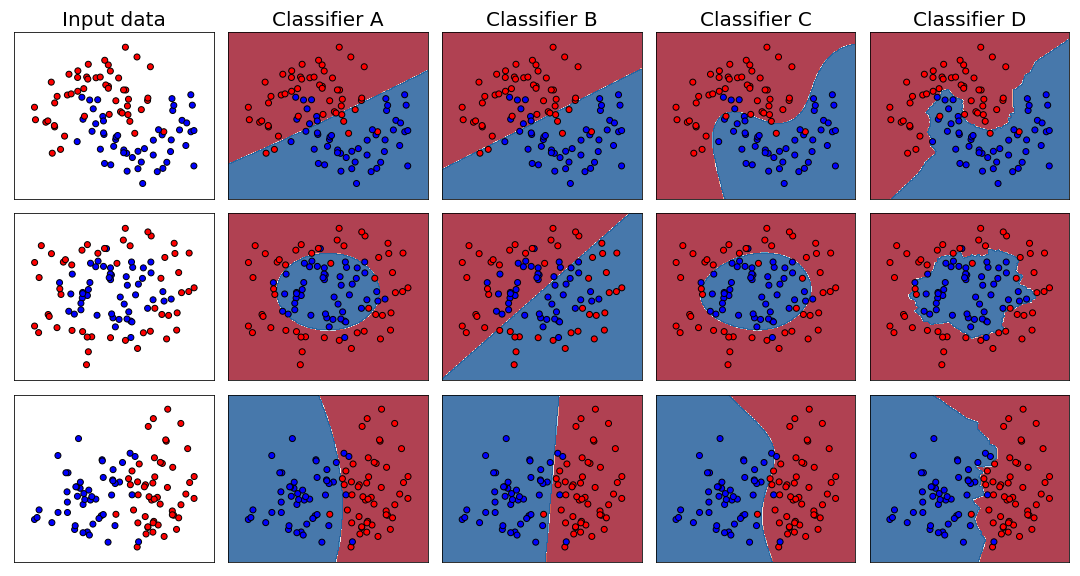

In [5]:
Image('figures/Classifiers.png', width=800)

The classifiers used to produce these results are: Fisher's Linear Discriminant, k-NN with k=3, Naïve Bayes classifier, and SVM with RBF kernel. Which classifier corresponds to which performance? Clearly justify your reasoning.

Classifier A is the Naive Bayes Classifier. As the decision surface best represents the Gaussianity assumption for each class.

Classifier B is the LDA classifier. The decision surface corresponds to a linear discriminant function.

Classifier C is the SVM classifier. As it creates non-linear boundaries that are smoother than the MLP classifier due to the RBF kernel.

Classifier D is the kNN classifier. The kNN decision surface is non-smooth for regions of overlapping classes.